# Pixel-MSE calculation

Notebook to calculate the pixel MSE and RMSE of the different tests, including the PSFEx test.

## MSE and ellipticity results

- **Dataset**: Simulated data based on the CFIS ellipticity variations using Sextractor

|      Tests                         |  pixel-MSE     | pixel-RMSE     |  e1-RMSE   | e2-RMSE    |  R2-RMSE   |
|:----------------------------------:|:--------------:|:--------------:|:----------:|:----------:|:----------:|
|**22**: RCA_PSFEx (KSIG=0.1)        |  2.365074e-07  |  4.863203e-04  |  0.001061  |  0.000680  |  0.486363  |
|**23**: RCA_hybrid (eig18, KSIG=0.1)|  4.419285e-07  |  6.647770e-04  |**0.000851**|  0.000694  |  0.307546  |
|**24**: RCA (eig24, KSIG=0.1)       |  4.597328e-07  |  6.780360e-04  |  0.000906  |**0.000670**|**0.300346**|
|**25**: RCA_PSFEx (KSIG=0)          |  2.476524e-07  |  4.976468e-04  |  0.001030  |  0.000680  |  0.486895  |
|**26**: RCA_PSFEx (KSIG=1)          |**2.003553e-07**|**4.476107e-04**|  0.001540  |  0.000689  |  0.460138  |
|**27**: RCA_PSFEx (KSIG=3)          |  2.015617e-07  |  4.489562e-04  |  0.002516  |  0.000777  |  0.399802  |
|**28**: PSFEx                       |  4.112598e-07  |  6.412954e-04  |  0.001019  |  0.000693  |  0.399379  |




## Test description

<table>
<tr><th> Test 22 </th><th> Test 23 </th><th> Test 24 </th></tr>
<tr><td>

|      Test 22  |  Value |
|:------------:|:------:|
|  CCD_n       |    38  |
|  n_eigenPSF  |    6  |
|  n_eigenVec  |    5   |
|  sigmaNoise  | 1e-3 |
|   test_per   |   0.5  |
|   KSIG       |   0.1    |
| Apply_degrad |  True  |
|   ALPHA      |   PSFEx |

</td><td>

|     Test 23   |  Value |
|:------------:|:------:|
|  CCD_n       |    38  |
|  n_eigenPSF  |    18  |
|  n_eigenVec  |    5  |
|  sigmaNoise  | 1e-3 |
|   test_per   |   0.5  |
|   KSIG       |   0.1    |
| Apply_degrad |  True  |
|   ALPHA      |   hybrid_1 |

</td><td>

|   Test 24     |  Value |
|:------------:|:------:|
|  CCD_n       |    38  |
|  n_eigenPSF  |    24  |
|  n_eigenVec  |    5  |
|  sigmaNoise  | 1e-3 |
|   test_per   |   0.5  |
|   KSIG       |   0.1    |
| Apply_degrad |  True  |
|   ALPHA      |   None |

</td></tr> </table>


<table>
<tr><th> Test 25 </th><th> Test 26 </th><th> Test 27 </th></tr>
<tr><td>

|    Test 25    |  Value |
|:------------:|:------:|
|  CCD_n       |    38  |
|  n_eigenPSF  |    6  |
|  n_eigenVec  |    5   |
|  sigmaNoise  | 1e-3 |
|   test_per   |   0.5  |
|   KSIG       |   0.0    |
| Apply_degrad |  True  |
|   ALPHA      |   PSFEx |


</td><td>

|   Test 26     |  Value |
|:------------:|:------:|
|  CCD_n       |    38  |
|  n_eigenPSF  |    6  |
|  n_eigenVec  |    5  |
|  sigmaNoise  | 1e-3 |
|   test_per   |   0.5  |
|   KSIG       |   1.0    |
| Apply_degrad |  True  |
|   ALPHA      |   PSFEx |

</td><td>

|     Test 27   |  Value |
|:------------:|:------:|
|  CCD_n       |    38  |
|  n_eigenPSF  |    6  |
|  n_eigenVec  |    5   |
|  sigmaNoise  |  1e-3  |
|   test_per   |   0.5  |
|   KSIG       |   3.0    |
| Apply_degrad |  True  |
|   ALPHA      |   PSFEx |

</td></tr> </table>


<table>
<tr><th> Test 28 </th></tr>
<tr><td>

|      Test 28  |  Value |
|:------------:|:------:|
|  CCD_n       |    38  |
|  PSFEx  |    regular parameters  |
|  sigmaNoise  | 1e-3 |
|   test_per   |   0.5  |

</td></tr> </table>



In [1]:
%matplotlib notebook
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits
import pickle
import random
from ShapePipe.shapepipe.pipeline import file_io
import glob
import shutil
import galsim.hsm as hsm
from galsim import Image

In [4]:
# Calculate the total MSE and RMSE for the catalogs on RCA-estimations
#
# Read and the results.txt file and write at the end the MSE and RMSE pixel results.

MSE_calc_flag = False

if MSE_calc_flag == True:
    MSE_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/MSE_pixel/test-22/results.txt'

    MSE, nStars, Dx, Dy= np.loadtxt(MSE_path, dtype=np.float, comments='#', 
                                    delimiter='\t', skiprows=1, usecols=(1,2,3,4), unpack=True)

    f = open(MSE_path,'a')

    MSE_tot = np.sum(MSE)/MSE.shape[0]
    RMSE_tot = np.sqrt(MSE_tot)
    print(MSE_tot)
    print(np.sqrt(MSE_tot))

    f.write('\n%s\t%.18f\t%d\n'%('MSE:',MSE_tot,MSE.shape[0]))
    f.write('\n%s\t%.18f\t%d\n'%('RMSE:',RMSE_tot,MSE.shape[0]))
    f.close()

In [116]:
#PSFEx_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/output_validation/test-28/PSFEx-simu_validation/psfexinterp_runner/output/validation_psf-0000000-38.fits'
PSFEx_val_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/output_validation/test-28/validation_TL/shapepipe_run_2020-01-14_16-14-45/psfexinterp_runner/output/'

test_14_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-14/PSFs/-0000001-38PSFs.npy'
test_8_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-8/PSFs/-0000001-38PSFs.npy'


model_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-14/PSFs/'
dataset_path = '/Users/tliaudat/Documents/PhD/codes/venv_p3/JB-data/CCD-38_sexdataset/'

# The model data file patterns
psf_pattern = '-*-38PSFs.npy'
dataset_pattern = 'test-star_selection-*-38.fits'
psfex_val_pattern = 'validation_psf-*-38.fits'


In [120]:
# Load the data
file_paths = glob.glob(model_path + psf_pattern)
dataset_paths = glob.glob(dataset_path + dataset_pattern)
psfex_val_paths = glob.glob(PSFEx_val_path + psfex_val_pattern)

file_paths.sort()
dataset_paths.sort()
psfex_val_paths.sort()
k = 0 # Catalog number
print('\nModel path [%d]: \n'%(k) + file_paths[k])
print('\nDataset path [%d]: \n'%(k) + dataset_paths[k])
print('\nPSFEx val path [%d]: \n'%(k) + psfex_val_paths[k])



Model path [0]: 
/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/raw-data/test-14/PSFs/-0000000-38PSFs.npy

Dataset path [0]: 
/Users/tliaudat/Documents/PhD/codes/venv_p3/JB-data/CCD-38_sexdataset/test-star_selection-0000000-38.fits

PSFEx val path [0]: 
/Users/tliaudat/Documents/PhD/codes/venv_p3/tests/output_validation/test-28/validation_TL/shapepipe_run_2020-01-14_16-14-45/psfexinterp_runner/output/validation_psf-0000000-38.fits


In [113]:
# RCA-based tests MSE
test_22_MSE = 0.000000236507438580 # 226 * 50
test_23_MSE = 0.000000441928486642 # 226 * 50
test_24_MSE = 0.000000459732760067
test_25_MSE = 0.000000247652363047
test_26_MSE = 0.000000200355344567
test_27_MSE = 0.000000201561700703


In [144]:
# Print RCA-based test results on pixel errors
test_22_RMSE = np.sqrt(test_22_MSE)
print('test_22_MSE = %e \n test_22_RMSE = %e'%(test_22_MSE,test_22_RMSE))
test_23_RMSE = np.sqrt(test_23_MSE)
print('test_23_MSE = %e \n test_23_RMSE = %e'%(test_23_MSE,test_23_RMSE))
test_24_RMSE = np.sqrt(test_24_MSE)
print('test_24_MSE = %e \n test_24_RMSE = %e'%(test_24_MSE,test_24_RMSE))
test_25_RMSE = np.sqrt(test_25_MSE)
print('test_25_MSE = %e \n test_25_RMSE = %e'%(test_25_MSE,test_25_RMSE))
test_26_RMSE = np.sqrt(test_26_MSE)
print('test_26_MSE = %e \n test_26_RMSE = %e'%(test_26_MSE,test_26_RMSE))
test_27_RMSE = np.sqrt(test_27_MSE)
print('test_27_MSE = %e \n test_27_RMSE = %e'%(test_27_MSE,test_27_RMSE))

test_22_MSE = 2.365074e-07 
 test_22_RMSE = 4.863203e-04
test_23_MSE = 4.419285e-07 
 test_23_RMSE = 6.647770e-04
test_24_MSE = 4.597328e-07 
 test_24_RMSE = 6.780360e-04
test_25_MSE = 2.476524e-07 
 test_25_RMSE = 4.976468e-04
test_26_MSE = 2.003553e-07 
 test_26_RMSE = 4.476107e-04
test_27_MSE = 2.015617e-07 
 test_27_RMSE = 4.489562e-04


In [147]:
# Extract PSFEx data and perform the pixel-MSE calculation
'''
Note that the PSFEx_dataset files are not useful as all the information is 
on the PSFEx_validation files.
['PSF_VIGNET'] corresponds to the model PSF
['STAR_VIGNET'] correspond to the test star
'''
# PSFEx_dataset = fits.open(dataset_paths[k])

cat_num = len(psfex_val_paths)
MSE_vec = np.zeros(cat_num)

for k in range(cat_num):
    PSFEx_psfs = fits.open(psfex_val_paths[k])
    
    MSE_vec[k] = np.sum(((PSFEx_psfs[2].data['PSF_VIGNET'] - PSFEx_psfs[2].data['STAR_VIGNET'])**2)/
                        (PSFEx_psfs[2].data['PSF_VIGNET'].size))


PSFEx_MSE = np.sum(MSE_vec)/MSE_vec.shape[0]
PSFEx_RMSE = np.sqrt(PSFEx_MSE)

In [148]:
# Print PSFEx pixel error results
print('PSFEx_MSE = %e \n PSFEx_RMSE = %e'%(PSFEx_MSE,PSFEx_RMSE))

PSFEx_MSE = 4.112598e-07 
 PSFEx_RMSE = 6.412954e-04


In [42]:
PSFEx_psfs[2].columns


ColDefs(
    name = 'PSF_VIGNET'; format = '2601D'; dim = '(51, 51)'
    name = 'E1_PSF_HSM'; format = '1D'
    name = 'E2_PSF_HSM'; format = '1D'
    name = 'SIGMA_PSF_HSM'; format = '1D'
    name = 'FLAG_PSF_HSM'; format = '1K'
    name = 'E1_STAR_HSM'; format = '1D'
    name = 'E2_STAR_HSM'; format = '1D'
    name = 'SIGMA_STAR_HSM'; format = '1D'
    name = 'FLAG_STAR_HSM'; format = '1K'
    name = 'STAR_VIGNET'; format = '2601D'; dim = '(51, 51)'
    name = 'NUMBER'; format = '1K'
    name = 'X'; format = '1D'
    name = 'Y'; format = '1D'
    name = 'ACCEPTED'; format = '1I'
)

In [124]:
PSFEx_dataset[2].columns

ColDefs(
    name = 'VIGNET'; format = '2601E'; dim = '(51, 51)'
    name = 'XWIN_IMAGE'; format = '1D'
    name = 'YWIN_IMAGE'; format = '1D'
    name = 'NUMBER'; format = '1K'
)

In [137]:
PSFEx_psfs[2].data['PSF_VIGNET'].size
#PSFEx_psfs[2].data['PSF_VIGNET'].shape


130050

<IPython.core.display.Javascript object>


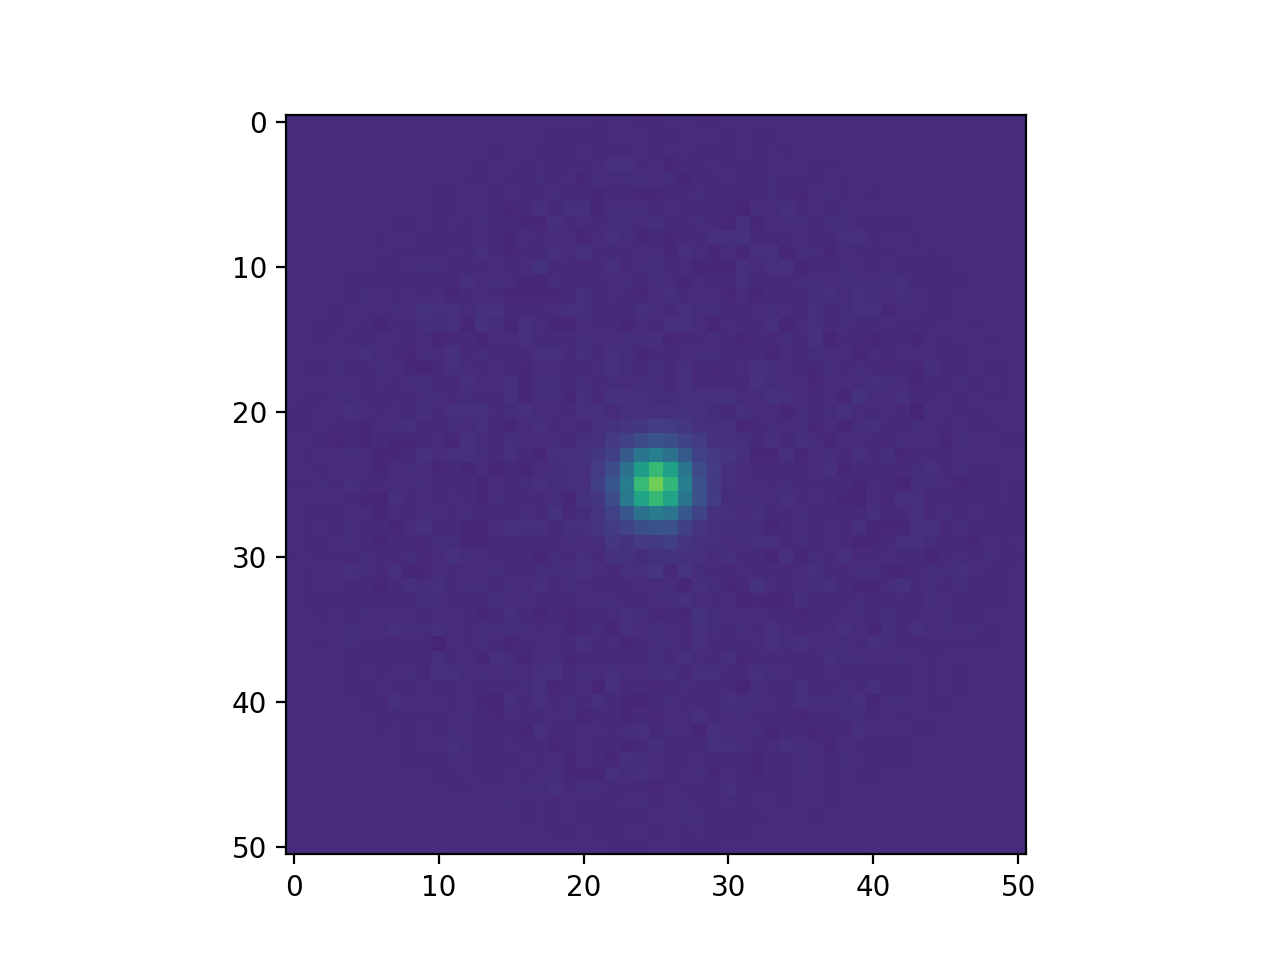

<IPython.core.display.Javascript object>


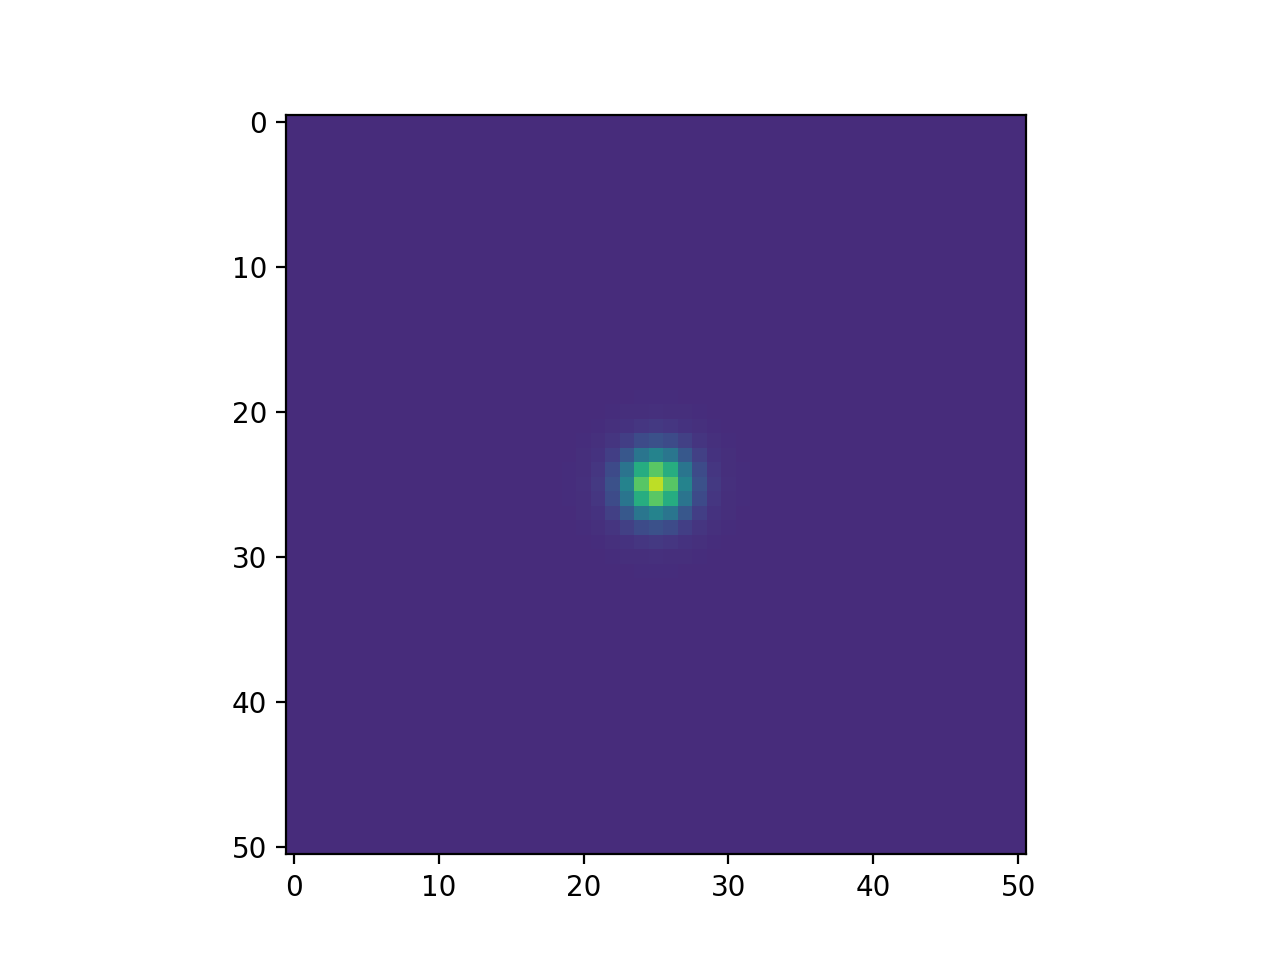

<IPython.core.display.Javascript object>


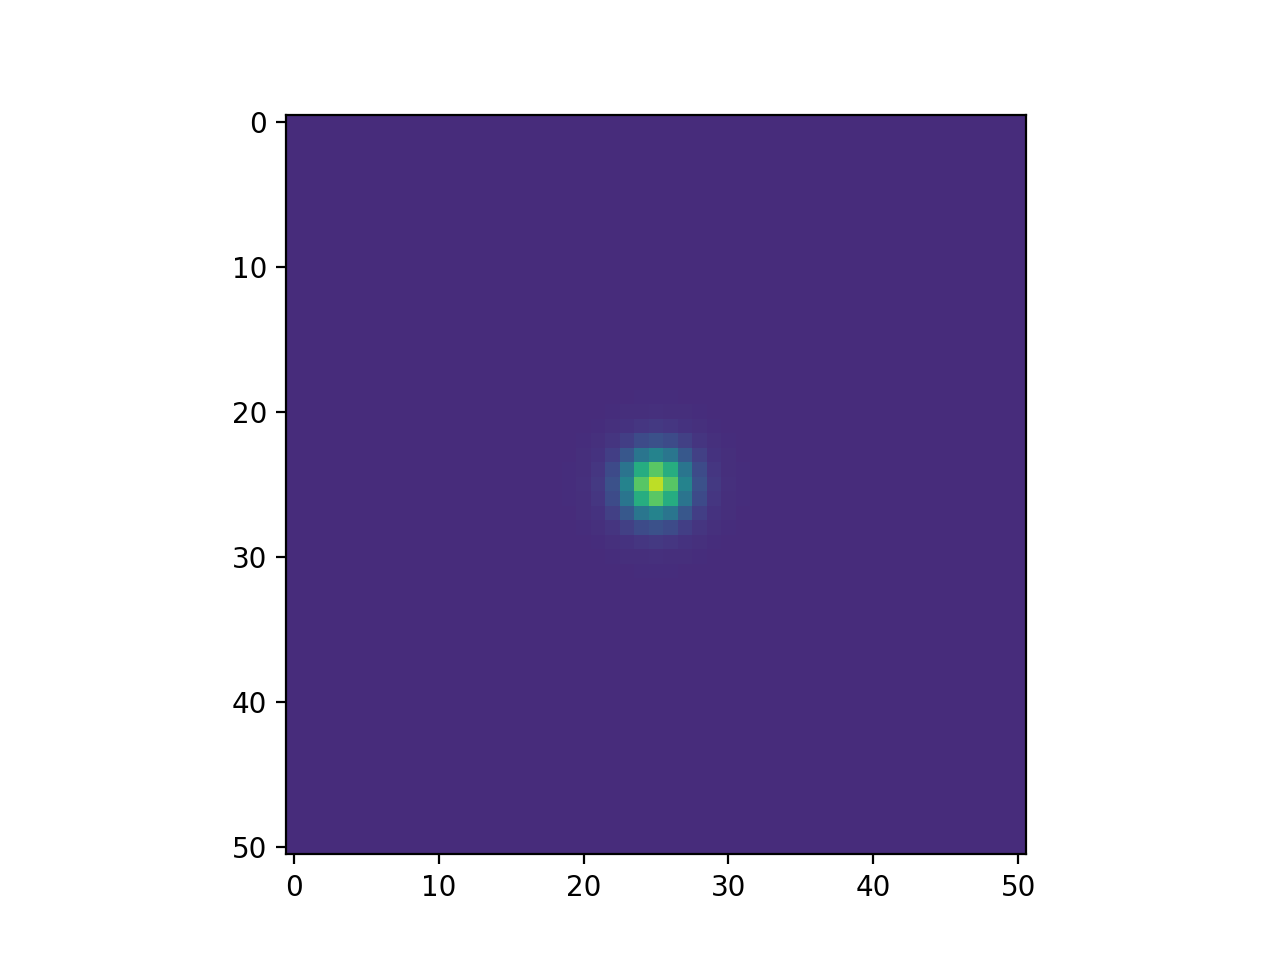

<IPython.core.display.Javascript object>


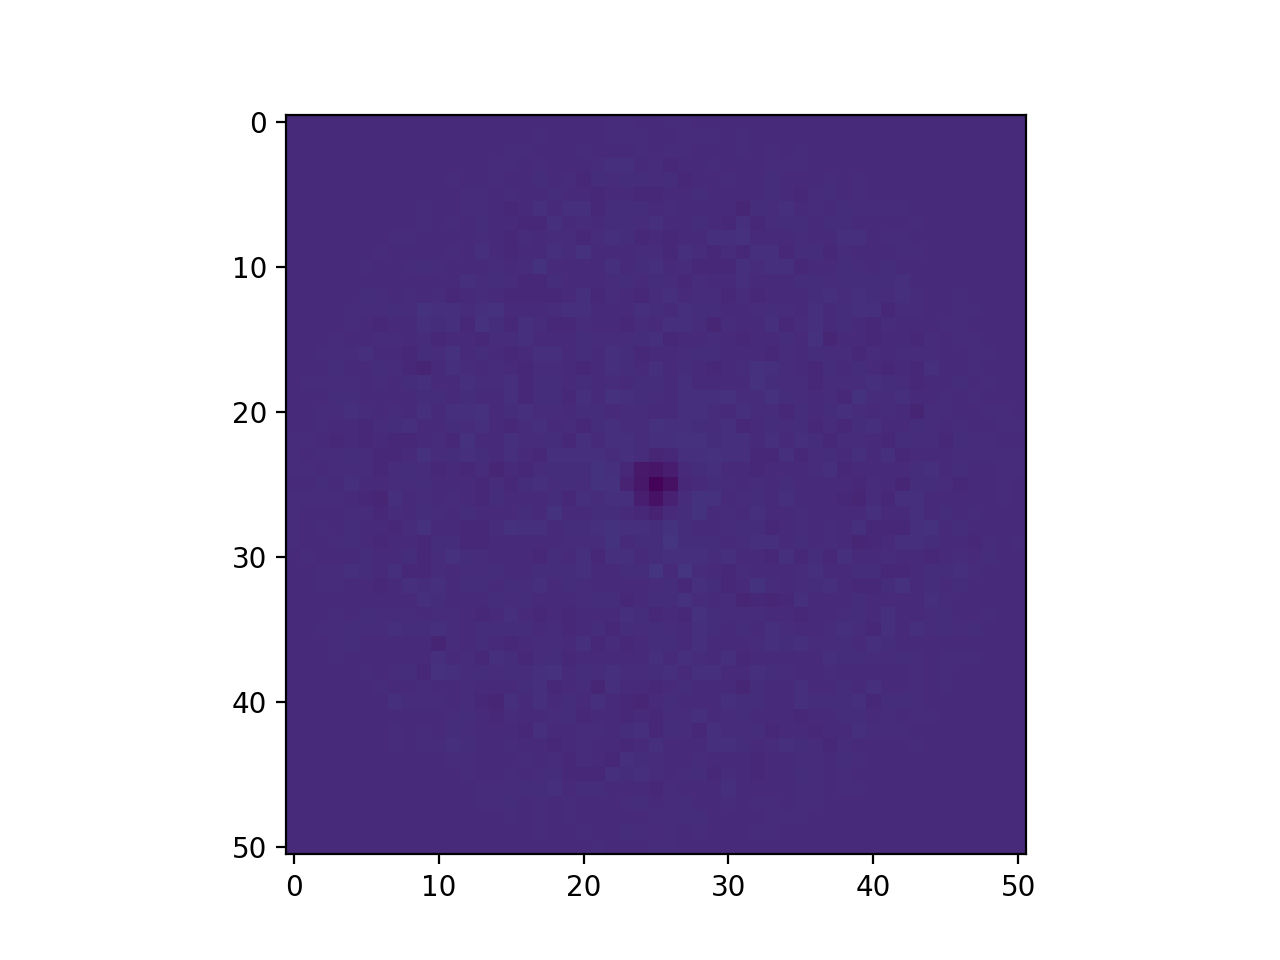

Residual (psf-star) = 0.000002410857629
Residual (star_cat-star) = 0.000000000000000


In [128]:
it = 0
psf = PSFEx_psfs[2].data['PSF_VIGNET'][it,:,:]
star = PSFEx_psfs[2].data['STAR_VIGNET'][it,:,:]
star_cat = PSFEx_dataset[2].data['VIGNET'][it,:,:]

plt.figure()
plt.imshow(psf, vmax=0.07, vmin=-0.01)
plt.figure()
plt.imshow(star, vmax=0.07, vmin=-0.01)
plt.figure()
plt.imshow(star_cat, vmax=0.07, vmin=-0.01)
plt.figure()
plt.imshow(psf-star, vmax=0.07, vmin=-0.01)
print('Residual (psf-star) = %.15f' %(np.sum(psf-star)/(psf.shape[0]*psf.shape[1])))
print('Residual (star_cat-star) = %.15f' %(np.sum(star_cat-star)/(star_cat.shape[0]*star_cat.shape[1])))
